# This is a beginner talk about using Pandas datatypes more effectively

(I'm cheating about pre-running these cells before the presentation, I reserve the right to re-run cells later)

### What is pandas = spreadsheets without as many limitations as one is used to

### These features are called DataFrames() and Series()

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
pd.options.display.max_rows = 15
#changing the column headings to title case to set up for the demo's below
parking_meters = pd.read_csv('treas_parking_meters_loc_datasd.csv')
# connection_info = sqlalchemy.engine("postgres://mydb/table", user = "", password = "")
# data = pd.read_sql('select * from ...', connection_info)
parking_meters.columns = parking_meters.columns.str.lower()
parking_meters.to_csv('treas_parking_meters_loc_datasd.csv', index=False)

## Take a look at where pandas sits in the python datascience heirarchy.

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="Python-datasci.jpg", width=600, height=600)

## The data we will be using is from the data.SanDiego.gov site.

In [3]:
#mea culpa: I changed the heading to be title case before I started this so I could have some way to manipulate the columns
parking_meters = pd.read_csv('treas_parking_meters_loc_datasd.csv')

In [4]:
parking_meters.head()

,zone,area,sub_area,pole,config_code,config_name,longitude,latitude
0,City,Barrio Logan,2900 ADDISON ST,ADN-2912,9116,30 Min Max $1.25 HR 8am-6pm Mon-Sat,-117.230904,32.721670
1,City,Barrio Logan,2900 ADDISON ST,ADN-2914,9116,30 Min Max $1.25 HR 8am-6pm Mon-Sat,-117.230913,32.721575
2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155


## here is how Pandas sees the types of data it collected (see the dtype column)

In [5]:
parking_meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zone         4653 non-null   object 
 1   area         4653 non-null   object 
 2   sub_area     4653 non-null   object 
 3   pole         4653 non-null   object 
 4   config_code  4653 non-null   int64  
 5   config_name  4653 non-null   object 
 6   longitude    4653 non-null   float64
 7   latitude     4653 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 290.9+ KB


## this is too much data for one column

In [6]:
parking_meters.config_name

0       30 Min Max $1.25 HR 8am-6pm Mon-Sat
1       30 Min Max $1.25 HR 8am-6pm Mon-Sat
2       2 Hour Max $1.25 HR 8am-6pm Mon-Sat
3       2 Hour Max $1.25 HR 8am-6pm Mon-Sat
4       2 Hour Max $1.25 HR 8am-6pm Mon-Sat
                       ...                 
4648    2 Hour Max $1.25 HR 8am-6pm Mon-Sat
4649    2 Hour Max $1.25 HR 8am-6pm Mon-Sat
4650    2 Hour Max $1.25 HR 8am-6pm Mon-Sat
4651    2 Hour Max $1.25 HR 8am-6pm Mon-Sat
4652    2 Hour Max $1.25 HR 8am-6pm Mon-Sat
Name: config_name, Length: 4653, dtype: object

### Don't ask me how they are going to split $1.25 evenly over the half an hour

# attached methods


### This is .str and it can be run without changing any types (usually) they generally come in as strings.

In [ ]:
#uncomment the next line to play around with tab complete at the end of .str.
#parking_meters.config_name.str.

In [18]:
# examples on what you can do
parking_meters.config_name.str.upper()  # uppercase

0       30 MIN MAX $1.25 HR 8AM-6PM MON-SAT
1       30 MIN MAX $1.25 HR 8AM-6PM MON-SAT
2       2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
3       2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
4       2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
                       ...                 
4648    2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
4649    2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
4650    2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
4651    2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
4652    2 HOUR MAX $1.25 HR 8AM-6PM MON-SAT
Name: config_name, Length: 4653, dtype: object

In [26]:
parking_meters.config_name.str.endswith("Sat") # query the info

0       True
1       True
2       True
3       True
4       True
        ... 
4648    True
4649    True
4650    True
4651    True
4652    True
Name: config_name, Length: 4653, dtype: bool

In [32]:
parking_meters.config_name.str.find('8am') # pass in a regex, get the index

0       20
1       20
2       20
3       20
4       20
        ..
4648    20
4649    20
4650    20
4651    20
4652    20
Name: config_name, Length: 4653, dtype: int64

In [36]:
parking_meters.config_name.str.split()


0       [30, Min, Max, $1.25, HR, 8am-6pm, Mon-Sat]
1       [30, Min, Max, $1.25, HR, 8am-6pm, Mon-Sat]
2       [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
3       [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
4       [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
                           ...                     
4648    [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
4649    [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
4650    [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
4651    [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
4652    [2, Hour, Max, $1.25, HR, 8am-6pm, Mon-Sat]
Name: config_name, Length: 4653, dtype: object

## How do we deal with this data now that it's not a string?

### The str accessor method still works because it really works with iterables.  it just has all the string methods associated with it.  There is no list accessor method.

In [38]:
parking_meters['max_time_label'] = parking_meters.config_name.str.split().str[0:3].str.join(sep=" ")
parking_meters.max_time_label

0       30 Min Max
1       30 Min Max
2       2 Hour Max
3       2 Hour Max
4       2 Hour Max
           ...    
4648    2 Hour Max
4649    2 Hour Max
4650    2 Hour Max
4651    2 Hour Max
4652    2 Hour Max
Name: max_time_label, Length: 4653, dtype: object

In [39]:
# that made a new column in our dataset called parking_meters.max_time_label
parking_meters.columns

Index(['zone', 'area', 'sub_area', 'pole', 'config_code', 'config_name',
       'longitude', 'latitude', 'max_time_label', 'max_time_limit'],
      dtype='object')

# Next we will load a new dataset for new types of problems

##  The rest of these accessor methods below we will need to change the type of the column to fit the datatype we want.


In [41]:
pothole_repair = pd.read_csv('pothole_requests_datasd_v1.csv')
# pothole_repair = pd.read_csv("https://seshat.datasd.org/get_it_done_311/pothole_requests_datasd_v1.csv")

In [42]:
pothole_repair.head(2)

,service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,case_record_type,service_name,service_name_detail,date_closed,status,...,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,public_description,iamfloc,floc,public_url
0,80508,52352.0,NaN,2016-05-20T08:55:00,0.0,TSW,Pothole,STREET - Streets and Alleys Pothole,2016-05-20T00:00:00,Closed,...,2.0,6.0,Clairemont Mesa,NaN,Phone,NaN,"test only, please dont create a notification",NaN,NaN,https://getitdone.force.com//TSWViewReportDeta...
1,80510,NaN,NaN,2016-05-20T09:05:00,0.0,TSW,Pothole,STREET - Streets and Alleys Pothole,2016-05-20T00:00:00,Closed,...,3.0,4.0,Downtown,NaN,Web,NaN,Test Only - Please close,NaN,SS-000222,https://getitdone.force.com//TSWViewReportDeta...


# I'm going to need to change date_requested, case_origin, and sap_notification_number in this next line to different types to fit the accessor methods I'm looking to show (and save space, starting off at the bottom it says it's 15.5 MB)

In [45]:
## what type of datatypes did it bring in?
pothole_repair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84791 entries, 0 to 84790
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   service_request_id         84791 non-null  int64  
 1   service_request_parent_id  28711 non-null  float64
 2   sap_notification_number    53154 non-null  float64
 3   date_requested             84791 non-null  object 
 4   case_age_days              83463 non-null  float64
 5   case_record_type           84791 non-null  object 
 6   service_name               84791 non-null  object 
 7   service_name_detail        84785 non-null  object 
 8   date_closed                82181 non-null  object 
 9   status                     84791 non-null  object 
 10  lat                        84755 non-null  float64
 11  lng                        84755 non-null  float64
 12  street_address             84693 non-null  object 
 13  zipcode                    59368 non-null  flo

# change date_requested to a datetime

In [52]:
pothole_repair.date_requested = pd.to_datetime(pothole_repair.date_requested)

In [49]:
pothole_repair.date_requested.info()  # look for datetime64[ns]

<class 'pandas.core.series.Series'>
RangeIndex: 84791 entries, 0 to 84790
Series name: date_requested
Non-Null Count  Dtype         
--------------  -----         
84791 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 662.6 KB


In [50]:
# feel free to uncomment the next line and see what list comes up with tab completion.
# pothole_repair.date_requested.dt.

<AxesSubplot:>

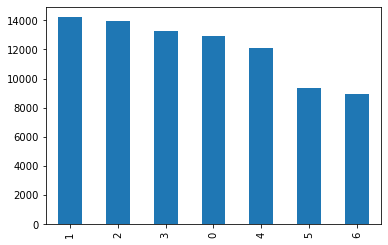

In [53]:
# What day_of_week do potholes get reported?

pothole_repair.date_requested.dt.day_of_week.value_counts().plot.bar()

<AxesSubplot:>

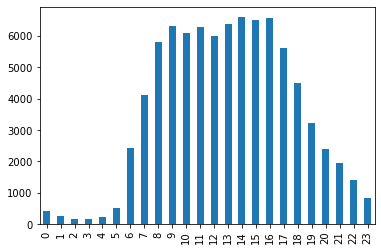

In [56]:
# what hour of the day do people report potholes?

pothole_repair.date_requested.dt.hour.value_counts().sort_index().plot.bar()

In [ ]:
# Lets look at categoricals
# This you can think of like an enumerated type instead of just string values

In [57]:
pothole_repair.case_origin.head()

0    Phone
1      Web
2    Phone
3    Phone
4      Web
Name: case_origin, dtype: object

In [58]:
pothole_repair.case_origin.info()

<class 'pandas.core.series.Series'>
RangeIndex: 84791 entries, 0 to 84790
Series name: case_origin
Non-Null Count  Dtype 
--------------  ----- 
84791 non-null  object
dtypes: object(1)
memory usage: 662.6+ KB


## here's where we change a column to categorical

In [70]:
pothole_repair.case_origin =  pothole_repair.case_origin.astype("category")

In [71]:
pothole_repair.case_origin.info()  #significant reduction of memory on this column 662.6KB->83.3KB

<class 'pandas.core.series.Series'>
RangeIndex: 84791 entries, 0 to 84790
Series name: case_origin
Non-Null Count  Dtype   
--------------  -----   
84791 non-null  category
dtypes: category(1)
memory usage: 83.3 KB


In [61]:
pothole_repair.case_origin.cat.codes  # what is actually in the column

0        5
1        9
2        5
3        5
4        9
        ..
84786    9
84787    5
84788    9
84789    4
84790    4
Length: 84791, dtype: int8

In [62]:
pothole_repair.case_origin.cat.categories  # these names are now kept in a separate dictionary

Index(['Crew/Self Generated', 'Email', 'Garage Run', 'Letter', 'Mobile',
       'Phone', 'Route Slip', 'Station 38 Incident Reports', 'Walk-In', 'Web'],
      dtype='object')

## Lets take a look at sparse columns.  

### for sparse columns I would usually have more missing data.

In [76]:
len(pothole_repair)

84791

In [74]:
sum(pothole_repair.sap_notification_number.isna())

31637

In [75]:
pothole_repair.sap_notification_number.info()

<class 'pandas.core.series.Series'>
RangeIndex: 84791 entries, 0 to 84790
Series name: sap_notification_number
Non-Null Count  Dtype  
--------------  -----  
53154 non-null  float64
dtypes: float64(1)
memory usage: 662.6 KB


In [77]:
pothole_repair.sap_notification_number = pothole_repair.sap_notification_number.astype(pd.SparseDtype("float", np.nan))

In [78]:
pothole_repair.sap_notification_number.info()  # a little savings on memory but not much.

<class 'pandas.core.series.Series'>
RangeIndex: 84791 entries, 0 to 84790
Series name: sap_notification_number
Non-Null Count  Dtype               
--------------  -----               
53154 non-null  Sparse[float64, nan]
dtypes: Sparse[float64, nan](1)
memory usage: 623.0 KB


In [79]:
pothole_repair.sap_notification_number.sparse.density  # 62.68% full

0.6268825700840891

In [80]:
pothole_repair.sap_notification_number.sparse.npoints

53154

In [81]:
pothole_repair.sap_notification_number.sparse.sp_values

array([1.50000744e+11, 1.50000744e+11, 1.50000744e+11, ...,
       4.03004582e+10, 4.03004585e+10, 4.03004584e+10])

# remember:

For most of these (except str) first convert the column to that type
then you can use these.

Then you have these groups of functionality specific to that datatype


# avoid using .apply()  (it's slow comparitively speaking)
# Avoid using "for" loops in Pandas.  You might find Pandas's type specific code that will work much faster because it knows the datatype it's working with.   These are tools that will help you on your quest.